In [10]:
import configparser

cfg = configparser.ConfigParser()
cfg.read('ML_인강/coco.ini')

# section 이름을 찍어봅시다.
for section in cfg.sections() :
    print(section)
    for i in cfg[section]:
        print(i)

In [11]:
import os
import pandas as pd
os.chdir(rf'{data_path}')

### 1. 데이터 병합하기: 1-12월 시트 하나의 데이터프레임으로 병합하기

In [12]:
wb = pd.ExcelFile('월별매출데이터.xlsx', engine='openpyxl')
sheetnames=wb.sheet_names
sheetnames

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [ ]:
# 시트명 만들기
sheet_nm = [ str(i)+'월' for i in range(12) ]

In [9]:
df1 = pd.read_excel('월별매출데이터.xlsx',sheet_name='1월',header=6)
df1.drop(df1.columns[0],axis=1, inplace=True)


In [10]:
df1.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹


In [11]:
df2 = pd.read_excel('월별매출데이터.xlsx',sheet_name='2월',header=6)
df2.drop(df2.columns[0],axis=1, inplace=True)
df2.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.2.1,지점4,제품A,4,C-262,서울특별시 마포구 상수동,주문완료,인터넷뱅킹
1,2018.2.1,지점2,제품F,6,C-277,서울특별시 종로구 연건동,주문완료,신용카드
2,2018.2.1,지점1,제품C,7,C-119,서울특별시 중구 주교동,배송중,무통장입금
3,2018.2.1,지점2,제품F,4,C-40,서울특별시 성동구 옥수동,배송완료,휴대폰결제
4,2018.2.1,지점4,제품D,7,C-112,서울특별시 마포구 구수동,주문완료,인터넷뱅킹


In [12]:
df_12 = pd.concat([df1,df2],axis=0,ignore_index=True)
df_12

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹
...,...,...,...,...,...,...,...,...
2948,2018.2.28,지점4,제품B,5,C-175,서울특별시 은평구 진관동,배송완료,인터넷뱅킹
2949,2018.2.28,지점2,제품D,7,C-327,서울특별시 중구 묵정동,배송완료,무통장입금
2950,2018.2.28,지점3,제품F,1,C-476,서울특별시 성북구 보문동7가,배송완료,무통장입금
2951,2018.2.28,지점4,제품E,5,C-239,서울특별시 중구 충무로3가,주문완료,인터넷뱅킹


In [13]:
concat_df = pd.DataFrame()
for sheet in sheetnames :
    df = pd.read_excel('월별매출데이터.xlsx',sheet_name=sheet,header=6) # skiprows = range(6)).iloc[:, 1:]
    df.drop(df.columns[0],axis=1, inplace=True)
    concat_df = pd.concat([concat_df,df],axis=0,ignore_index=True )
concat_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018.1.1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018.1.1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018.1.1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018.1.1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018.1.1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹
...,...,...,...,...,...,...,...,...
18224,2018-12-31,지점1,제품F,6,C-59,서울특별시 성북구 보문동3가,배송중,신용카드
18225,2018-12-31,지점2,제품D,9,C-287,서울특별시 중구 의주로1가,배송중,인터넷뱅킹
18226,2018-12-31,지점4,제품D,5,C-175,서울특별시 종로구 명륜1가,주문완료,인터넷뱅킹
18227,2018-12-31,지점1,제품B,4,C-17,서울특별시 영등포구 양평동3가,주문완료,인터넷뱅킹


### 2. 포맷 통일 및 변수 추가

#### 1) '일자' 날짜 형식 통일하기

In [17]:
concat_df['일자'] = concat_df['일자'].str.replace('.','-')

<ipython-input-17-b791dc8b18fb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  concat_df['일자'] = concat_df['일자'].str.replace('.','-')


In [18]:
concat_df['일자']

0          2018-1-1
1          2018-1-1
2          2018-1-1
3          2018-1-1
4          2018-1-1
            ...    
18224    2018-12-31
18225    2018-12-31
18226    2018-12-31
18227    2018-12-31
18228    2018-12-31
Name: 일자, Length: 18229, dtype: object

In [20]:
concat_df

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹
...,...,...,...,...,...,...,...,...
18224,2018-12-31,지점1,제품F,6,C-59,서울특별시 성북구 보문동3가,배송중,신용카드
18225,2018-12-31,지점2,제품D,9,C-287,서울특별시 중구 의주로1가,배송중,인터넷뱅킹
18226,2018-12-31,지점4,제품D,5,C-175,서울특별시 종로구 명륜1가,주문완료,인터넷뱅킹
18227,2018-12-31,지점1,제품B,4,C-17,서울특별시 영등포구 양평동3가,주문완료,인터넷뱅킹


#### 2) '주문금액' 이라는 새로운 열 만들기
- 주문금액 = 수량 * 가격 * 1.1(부가세)
- 제품별 가격정보는 제품별_가격정보.xlsx에 포함.

In [41]:
price = pd.read_excel('제품별_가격정보.xlsx',header=None)
price

,0,1,2,3,4,5,6
0,제품,제품A,제품B,제품C,제품D,제품E,제품F
1,가격,20000,5000,10000,8000,30000,15000


In [42]:
price.transpose()

,0,1
0,제품,가격
1,제품A,20000
2,제품B,5000
3,제품C,10000
4,제품D,8000
5,제품E,30000
6,제품F,15000


In [43]:
price = price.transpose()
price.columns = ['제품','가격']
price

,제품,가격
0,제품,가격
1,제품A,20000
2,제품B,5000
3,제품C,10000
4,제품D,8000
5,제품E,30000
6,제품F,15000


In [51]:
price.drop(price.index[0],inplace=True)

In [52]:
price

,제품,가격
1,제품A,20000
2,제품B,5000
3,제품C,10000
4,제품D,8000
5,제품E,30000
6,제품F,15000


In [54]:
sales_price =pd.merge(concat_df,price,left_on='품명', right_on='제품')
sales_price

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,제품,가격
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,제품B,5000
1,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,제품B,5000
2,2018-1-1,지점1,제품B,8,C-462,서울특별시 중구 방산동,주문완료,인터넷뱅킹,제품B,5000
3,2018-1-1,지점4,제품B,8,C-163,서울특별시 종로구 동숭동,배송중,신용카드,제품B,5000
4,2018-1-1,지점2,제품B,7,C-357,서울특별시 노원구 중계동,주문완료,신용카드,제품B,5000
...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-28,지점4,제품A,9,C-491,서울특별시 종로구 효자동,주문완료,인터넷뱅킹,제품A,20000
18225,2018-12-29,지점4,제품A,8,C-180,서울특별시 강남구 신사동,배송중,휴대폰결제,제품A,20000
18226,2018-12-30,지점4,제품A,3,C-110,서울특별시 송파구 신천동,주문완료,인터넷뱅킹,제품A,20000
18227,2018-12-30,지점3,제품A,4,C-2,서울특별시 중구 남산동2가,배송중,무통장입금,제품A,20000


In [55]:
sales_price.drop('제품',axis=1, inplace=True)
sales_price

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000
1,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000
2,2018-1-1,지점1,제품B,8,C-462,서울특별시 중구 방산동,주문완료,인터넷뱅킹,5000
3,2018-1-1,지점4,제품B,8,C-163,서울특별시 종로구 동숭동,배송중,신용카드,5000
4,2018-1-1,지점2,제품B,7,C-357,서울특별시 노원구 중계동,주문완료,신용카드,5000
...,...,...,...,...,...,...,...,...,...
18224,2018-12-28,지점4,제품A,9,C-491,서울특별시 종로구 효자동,주문완료,인터넷뱅킹,20000
18225,2018-12-29,지점4,제품A,8,C-180,서울특별시 강남구 신사동,배송중,휴대폰결제,20000
18226,2018-12-30,지점4,제품A,3,C-110,서울특별시 송파구 신천동,주문완료,인터넷뱅킹,20000
18227,2018-12-30,지점3,제품A,4,C-2,서울특별시 중구 남산동2가,배송중,무통장입금,20000


In [56]:
sales_price['주문금액'] = sales_price['수량'] * sales_price['가격'] * 1.1
sales_price

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0
1,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0
2,2018-1-1,지점1,제품B,8,C-462,서울특별시 중구 방산동,주문완료,인터넷뱅킹,5000,44000.0
3,2018-1-1,지점4,제품B,8,C-163,서울특별시 종로구 동숭동,배송중,신용카드,5000,44000.0
4,2018-1-1,지점2,제품B,7,C-357,서울특별시 노원구 중계동,주문완료,신용카드,5000,38500.0
...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-28,지점4,제품A,9,C-491,서울특별시 종로구 효자동,주문완료,인터넷뱅킹,20000,198000.0
18225,2018-12-29,지점4,제품A,8,C-180,서울특별시 강남구 신사동,배송중,휴대폰결제,20000,176000.0
18226,2018-12-30,지점4,제품A,3,C-110,서울특별시 송파구 신천동,주문완료,인터넷뱅킹,20000,66000.0
18227,2018-12-30,지점3,제품A,4,C-2,서울특별시 중구 남산동2가,배송중,무통장입금,20000,88000.0


#### 3) ANOTHER WAY

In [138]:
price_df = pd.read_excel('제품별_가격정보.xlsx')
price_df

,제품,제품A,제품B,제품C,제품D,제품E,제품F
0,가격,20000,5000,10000,8000,30000,15000


In [139]:
price_df = price_df.T # .T: 전치 행렬 반환
price_df

,0
제품,가격
제품A,20000
제품B,5000
제품C,10000
제품D,8000
제품E,30000
제품F,15000


In [140]:
price_dict = price_df.loc['제품A':'제품F', 0].to_dict() # to_dict(): series를 dictionary로 변환 (index -> key, data -> value)
price_dict

{'제품A': 20000,
 '제품B': 5000,
 '제품C': 10000,
 '제품D': 8000,
 '제품E': 30000,
 '제품F': 15000}

In [141]:
concat_df['가격']= concat_df['품명'].replace(price_dict)
concat_df.head()

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000
1,2018-1-1,지점2,제품F,8,C-87,서울특별시 서대문구 신촌동,배송완료,신용카드,15000
2,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000
3,2018-1-1,지점3,제품D,7,C-307,서울특별시 서대문구 냉천동,주문완료,휴대폰결제,8000
4,2018-1-1,지점2,제품E,9,C-342,서울특별시 종로구 묘동,배송완료,인터넷뱅킹,30000


### 3. 월별 매출 추이 파악

#### 1) '월' 추출하기

In [58]:
date = sales_price['일자'].str.split('-',expand=True)
date

,0,1,2
0,2018,1,1
1,2018,1,1
2,2018,1,1
3,2018,1,1
4,2018,1,1
...,...,...,...
18224,2018,12,28
18225,2018,12,29
18226,2018,12,30
18227,2018,12,30


In [82]:
sales_price['월'] = date[1].astype(int)
sales_price

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0,1
1,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0,1
2,2018-1-1,지점1,제품B,8,C-462,서울특별시 중구 방산동,주문완료,인터넷뱅킹,5000,44000.0,1
3,2018-1-1,지점4,제품B,8,C-163,서울특별시 종로구 동숭동,배송중,신용카드,5000,44000.0,1
4,2018-1-1,지점2,제품B,7,C-357,서울특별시 노원구 중계동,주문완료,신용카드,5000,38500.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-28,지점4,제품A,9,C-491,서울특별시 종로구 효자동,주문완료,인터넷뱅킹,20000,198000.0,12
18225,2018-12-29,지점4,제품A,8,C-180,서울특별시 강남구 신사동,배송중,휴대폰결제,20000,176000.0,12
18226,2018-12-30,지점4,제품A,3,C-110,서울특별시 송파구 신천동,주문완료,인터넷뱅킹,20000,66000.0,12
18227,2018-12-30,지점3,제품A,4,C-2,서울특별시 중구 남산동2가,배송중,무통장입금,20000,88000.0,12


#### 2) line graph 그리기

In [142]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (20, 10)

In [88]:
pivot_sales = pd.pivot_table(sales_price, index = '월', columns='품명', values='주문금액',aggfunc='sum')
pivot_sales

품명,제품A,제품B,제품C,제품D,제품E,제품F
월,,,,,,
1,7392000.0,8283000.0,18722000.0,23170400.0,32010000.0,24634500.0
2,7722000.0,6242500.0,16808000.0,22589600.0,25146000.0,25806000.0
3,8756000.0,7771500.0,17204000.0,20556800.0,26664000.0,30063000.0
4,10978000.0,7573500.0,19635000.0,24173600.0,29007000.0,30888000.0
5,9658000.0,5984000.0,19899000.0,22880000.0,25113000.0,27027000.0
6,7920000.0,7161000.0,20185000.0,21410400.0,29106000.0,25228500.0
7,9900000.0,7337000.0,18744000.0,22536800.0,27192000.0,29980500.0
8,10032000.0,7562500.0,17479000.0,21084800.0,26961000.0,28726500.0
9,10208000.0,6473500.0,18909000.0,22545600.0,29634000.0,29419500.0


([<matplotlib.axis.XTick at 0x24b54f60400>,
 [Text(0, 0, '1월'),
  Text(1, 0, '2월'),
  Text(2, 0, '3월'),
  Text(3, 0, '4월'),
  Text(4, 0, '5월'),
  Text(5, 0, '6월'),
  Text(6, 0, '7월'),
  Text(7, 0, '8월'),
  Text(8, 0, '9월'),
  Text(9, 0, '10월'),
  Text(10, 0, '11월'),
  Text(11, 0, '12월')])

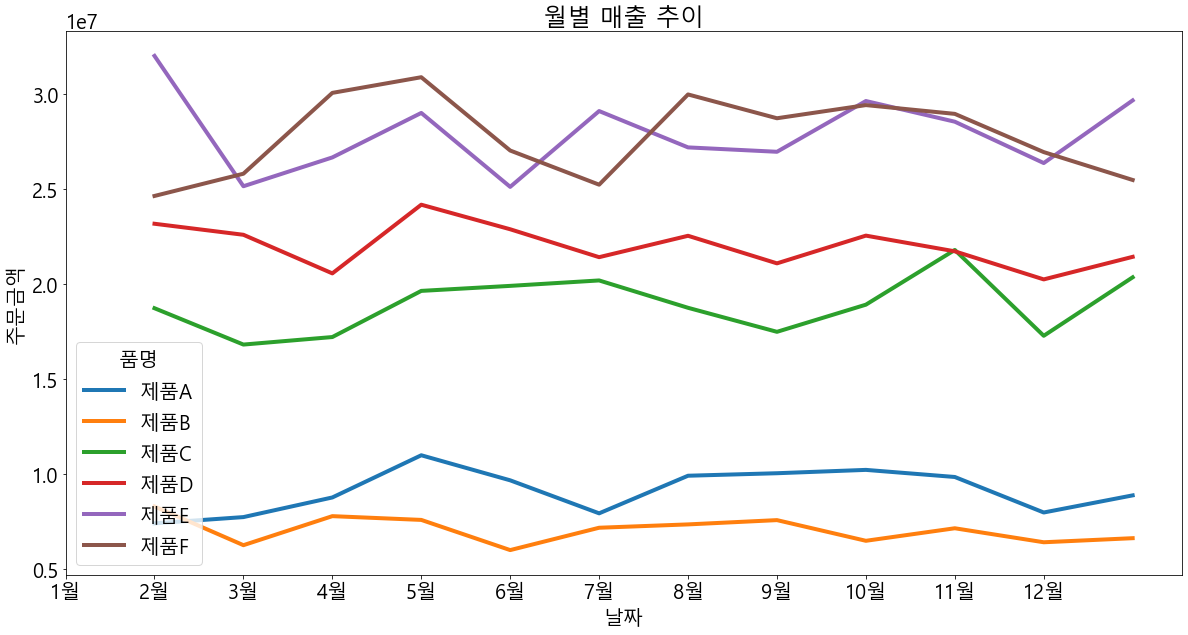

In [151]:
pivot_sales.plot(kind = 'line', linewidth = 4)
plt.title("월별 매출 추이")
plt.xlabel("날짜")
plt.ylabel("주문금액")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])

In [87]:
monthly_product_sales = sales_price.groupby(['월','품명'],as_index=False)['주문금액'].sum()
monthly_product_sales.sort_values(by='월')

,월,품명,주문금액
0,1,제품A,7392000.0
1,1,제품B,8283000.0
2,1,제품C,18722000.0
3,1,제품D,23170400.0
4,1,제품E,32010000.0
...,...,...,...
66,12,제품A,8866000.0
67,12,제품B,6611000.0
68,12,제품C,20350000.0
69,12,제품D,21428000.0


In [70]:
monthly_product_sales['품명'].unique()

array(['제품A', '제품B', '제품C', '제품D', '제품E', '제품F'], dtype=object)

In [144]:
monthly_product_sales['월'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [148]:
monthly_sales = sales_price.groupby(['월'],as_index=False)['주문금액'].sum()
monthly_sales

,월,주문금액
0,1,114211900.0
1,2,104314100.0
2,3,111015300.0
3,4,122255100.0
4,5,110561000.0
5,6,111010900.0
6,7,115690300.0
7,8,111845800.0
8,9,117189600.0
9,10,117979400.0


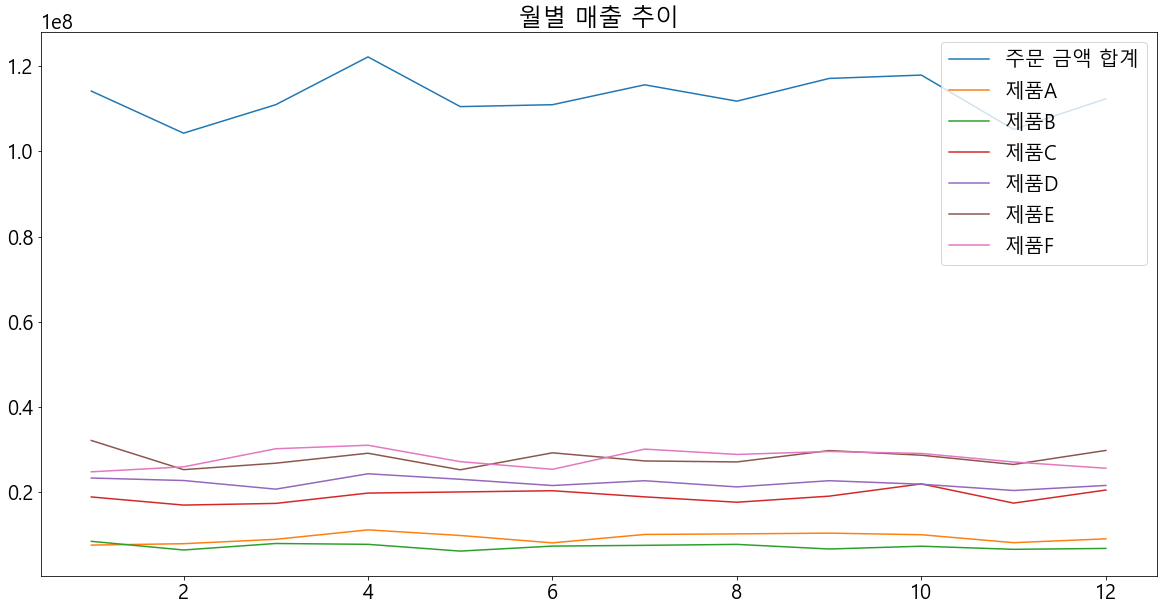

In [149]:
plt.title("월별 매출 추이")
plt.plot(monthly_sales['월'],
         monthly_sales['주문금액'],
         label = "주문 금액 합계")

for product in monthly_product_sales['품명'].unique():
    plt.plot(monthly_product_sales['월'].unique(), # 월의 개수가 12 * 품목 개수라는 것에 주의
             monthly_product_sales.loc[monthly_product_sales['품명'] == product]['주문금액'], # 마스킹 검색            
             label = product)

plt.legend(loc = 'upper right')

### 4.다양한 조건에 따른 판매 통계 분석

#### 1) 제품별 판매량 합계: bar plot

In [94]:
sales_price

,일자,지점,품명,수량,주문인 ID,수령 주소,주문 상태,결제 수단,가격,주문금액,월
0,2018-1-1,지점1,제품B,3,C-168,서울특별시 동작구 흑석동,주문완료,인터넷뱅킹,5000,16500.0,1
1,2018-1-1,지점4,제품B,2,C-158,서울특별시 종로구 종로5가,배송완료,휴대폰결제,5000,11000.0,1
2,2018-1-1,지점1,제품B,8,C-462,서울특별시 중구 방산동,주문완료,인터넷뱅킹,5000,44000.0,1
3,2018-1-1,지점4,제품B,8,C-163,서울특별시 종로구 동숭동,배송중,신용카드,5000,44000.0,1
4,2018-1-1,지점2,제품B,7,C-357,서울특별시 노원구 중계동,주문완료,신용카드,5000,38500.0,1
...,...,...,...,...,...,...,...,...,...,...,...
18224,2018-12-28,지점4,제품A,9,C-491,서울특별시 종로구 효자동,주문완료,인터넷뱅킹,20000,198000.0,12
18225,2018-12-29,지점4,제품A,8,C-180,서울특별시 강남구 신사동,배송중,휴대폰결제,20000,176000.0,12
18226,2018-12-30,지점4,제품A,3,C-110,서울특별시 송파구 신천동,주문완료,인터넷뱅킹,20000,66000.0,12
18227,2018-12-30,지점3,제품A,4,C-2,서울특별시 중구 남산동2가,배송중,무통장입금,20000,88000.0,12


In [96]:
num_sales = sales_price.groupby(['품명'],as_index=False)['수량'].sum()
num_sales

,품명,수량
0,제품A,4965
1,제품B,15369
2,제품C,20636
3,제품D,30038
4,제품E,10164
5,제품F,20191


<BarContainer object of 6 artists>

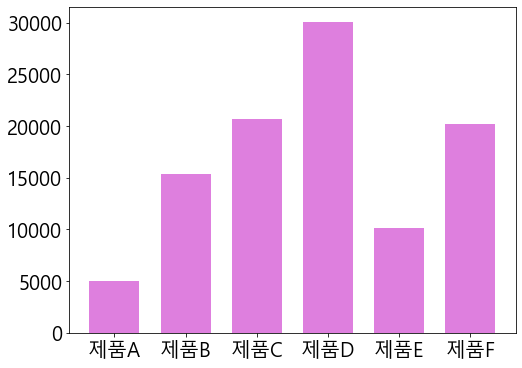

In [155]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.bar(num_sales['품명'],num_sales['수량'],width=0.7,color='m',alpha=0.5)

#### 2) 제품과 결제 수단에 따른 heapmap

In [113]:
order_item = pd.pivot_table(sales_price,index = '품명', columns='결제 수단', values='주문금액',aggfunc='sum' )
order_item

결제 수단,무통장입금,신용카드,인터넷뱅킹,휴대폰결제
품명,,,,
제품A,10714000.0,40788000.0,43802000.0,13926000.0
제품B,8508500.0,29271000.0,38918000.0,7832000.0
제품C,22462000.0,79739000.0,100320000.0,24475000.0
제품D,28221600.0,92004000.0,117260000.0,26848800.0
제품E,33693000.0,114642000.0,154275000.0,32802000.0
제품F,35458500.0,119872500.0,143764500.0,34056000.0


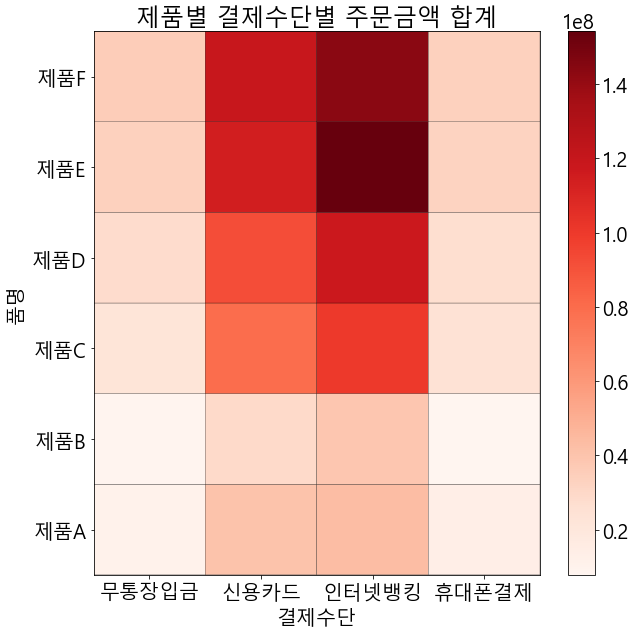

In [156]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.pcolor(order_item,edgecolors = 'black', cmap = plt.cm.Reds)
plt.title('제품별 결제수단별 주문금액 합계')
plt.xlabel('결제수단')
plt.ylabel('품명')
plt.xticks(np.arange(0.5,len(order_item.columns),1),order_item.columns)
plt.yticks(np.arange(0.5,len(order_item.index),1),order_item.index)
plt.colorbar()


### 5. 충성고객 찾기

In [122]:
loyal_customer = sales_price.groupby(['주문인 ID'],as_index=False)['주문금액'].agg(['sum','count'])
loyal_customer

,sum,count
주문인 ID,,
C-0,1822700.0,34
C-1,2779700.0,36
C-10,2774200.0,34
C-100,3950100.0,46
C-101,2922700.0,32
...,...,...
C-95,3234000.0,41
C-96,2838000.0,39
C-97,2979900.0,31


In [126]:
loyal_customer = loyal_customer.sort_values(['sum','count'],ascending=False)

In [127]:
loyal_customer

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-35,4453900.0,43
C-320,4313100.0,63
C-106,4276800.0,46
...,...,...
C-170,1469600.0,25
C-309,1392600.0,22
C-227,1241900.0,26


#### 상위 10% 충성 고객 찾기

In [128]:
len(loyal_customer)*0.1

50.0

In [131]:
int(len(loyal_customer)*0.1)

50

In [168]:
loyal_customer.iloc[:int(len(loyal_customer)*0.1)][:10]

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-35,4453900.0,43
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-302,3974300.0,38


In [159]:
sum_10 = loyal_customer['sum'] >= loyal_customer['sum'].quantile(0.9)
count_10 = loyal_customer['count'] >= loyal_customer['count'].quantile(0.9)

In [167]:
loyal_customer.loc[sum_10 & count_10].sort_values(by=['sum','count'],ascending=False)[:10]

,sum,count
주문인 ID,,
C-450,4759700.0,51
C-288,4640900.0,50
C-320,4313100.0,63
C-106,4276800.0,46
C-189,4250400.0,49
C-389,4171200.0,47
C-475,4012800.0,46
C-439,3972100.0,50
C-100,3950100.0,46
